# Embankment

A numerical approach to determining the flow beneath an embankment.

<img src="./images/embankment_diagram.jpg">
<center>Figure 1. Cross-section through a conceptual embankment overlying a permeable stratum.</center>

## Method

### 1. Discretization
The solution domain must be broken down into a set of representative points (discretized). This will allow the domain below the embankment to be visualized as a mesh.

### 2. Set of Governing Equations
Laplace equation is used to represent the physical process through the embankment, expressed as:

$$\nabla^2 H = \frac{\partial^2 H}{\partial x^2} + \frac{\partial^2 H}{\partial y^2}$$

### 3. Numerical Representation of Governing Equations
Using partial derivatives that are accurate to second order in the mesh spacing. The 2nd order finite difference equation is:

$${-2(h^2+k^2)}H_{i,j}+k^2 H_{i-1,j}+k^2 H_{i+1,j}+h^2 H_{i,j-1}+h^2 H_{i,j+1}=0 $$

where $H_{i,j}$ is the head at any internal grid point i, j.

### 4. Boundary Conditions
The domain is bounded and at each boundary there are potential effects of the boundary on the interior of the domain. The mesh must be constructed so that all boundary points coincide with the boundary of the mesh. An equation must be specified at every boundary point.

- At the inflow and outflow boundaries, the equation is trivial and the value of $H_{i,j}$ at these point is simply the total head. For example, at each inflow point: 

$$H_{i,j}=h_1$$

- At the other boundaries, a finite difference expression must be constructed by combining the governing equation with another equation stating that the gradient in $H$ normal to the boundary is zero. We need four expressions for the left, right, upper (that is, beneath the embankment) and lower boundaries which are respectively:<br>$${-2(h^2+k^2)}H_{i,j}+2k^2 H_{i+1,j}+h^2 H_{i,j-1}+h^2 H_{i,j+1}=0$$<br>$${-2(h^2+k^2)}H_{i,j}+2k^2 H_{i-1,j}+h^2 H_{i,j-1}+h^2 H_{i,j+1}=0$$<br>$${-2(h^2+k^2)}H_{i,j}+k^2 H_{i-1,j}+k^2 H_{i+1,j}+2h^2 H_{i,j-1}=0$$<br>$${-2(h^2+k^2)}H_{i,j}+k^2 H_{i-1,j}+k^2 H_{i+1,j}+2h^2 H_{i,j+1}=0$$<br>
- There are two special boundary condition points: the lower left grid point and the lower right grid point. The applicable boundary conditions at these are respectively:<br>$${-2(h^2+k^2)}H_{i,j}+2k^2 H_{i+1,j}+2h^2 H_{i,j+1}=0$$<br>$${-2(h^2+k^2)}H_{i,j}+2k^2 H_{i-1,j}+2h^2 H_{i,j+1}=0$$<br>

### Solution Method for Numerical Equations
Constructs the full set of linear equations that incorporates an equation for each boundary and internal point. This will form a matrix that maps each point i,j to a row and column number in the matrix.

The solution will be:

$$A \hat H =\hat b$$

where $A$ is the coefficient matrix, $\hat H$ is the unknown column vector of head values at each grid point and $\hat b$ is the column vector containing the constant value from the equation corresponding to each grid point.

Thus in order to solve for $\hat H$, the equation is rearranged to $\hat H = A^{-1} \hat b$

Once $\hat H$ is solved, the velocity components can be computed using 2nd order finite differences again as:<br>$$u=-K \frac{\partial^2 H}{\partial x^2}=\frac{H_{i-1,j}+H_{i+1,j}}{2h}$$<br>$$v=-K \frac{\partial^2 H}{\partial y^2}=\frac{H_{i,j-1}+H_{i,j+1}}{2k}$$<br>
The total volume flux of water beneath the embankment can be determined by integrating the velocity normal to a defined surface. The total volume flux per unit length along the crest of the embankment $q$ can be computed as:

$$q=\oint \vec{u} \cdot \hat n \partial A$$

$u$ is the velocity vector at the defined surface, $\hat n$ is the local unit normal vector of the defined surface and $\partial A$ is an elemental area of the defined surface. 

The surface beneath the center of the embankment is therefore planar and of unit thickness, thus the above equation reduces to:

$$q=\int_{0}^{D} u(y) \partial y$$

Note: the integral in the equation above can be approximated using the Trapezoidal rule.

$$q=\int_{0}^{D} u(y) \partial y \approx k(\frac{u_{i,1}}{2}+u_{i,2}+u_{i,3}+u_{i,4}+ ... +u_{i.n-1} + u_{i,n} + \frac{u_{i,n+1}}{2})$$


In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

#Boundary conditions established
h1=3;h2=1;L=70;D=30;width=35;K=0.0001;h=1;k=1;i=1;j=1;m=int(L/h)+1;n=int(D/k)+1
arr_len=int(m*n) #length of array
A=np.matrix(np.zeros((arr_len,arr_len)))
H=np.zeros(arr_len)
b=np.zeros(arr_len)

In [2]:
#Establishing Matrix A
for l in range(arr_len):
    if l==0: #bottom left element
        A[l,l]=-2*(h**2+k**2)
        A[l,l+n]=2*(k**2)
        A[l,l+1]=2*(h**2)
    elif l==arr_len-n: #bottom right element
        A[l,l]=-2*(h**2+k**2)
        A[l,l-n]=2*(k**2)
        A[l,l+1]=2*(h**2)
    elif (l+1)%n==0: #top boundary
        if l<=((L-width)/(2*h))*n: #Surface before embankment
            A[l,l]=1
            b[l]=h1
        elif l>=((width/h)+((L-width)/(2*h)))*n:   #Surface after embankment
            A[l,l]=1
            b[l]=h2
        else:                                        #Surface under the embankment
            A[l,l]=-2*(h**2+k**2)
            A[l,l-n]=k**2
            A[l,l+n]=k**2
            A[l,l-1]=2*(h**2)
    elif (l+1)<n:  #left boundary
        A[l,l]=-2*(h**2+k**2)
        A[l,l+n]=2*(k**2)
        A[l,l-1]=h**2
        A[l,l+1]=h**2
    elif l>=(m-1)*n: #right boundary
        A[l,l]=-2*(h**2+k**2)
        A[l,l-n]=2*(k**2)
        A[l,l-1]=h**2
        A[l,l+1]=h**2
    elif l%n==0:  #bottom boundary
        A[l,l]=-2*(h**2+k**2)
        A[l,l-n]=k**2
        A[l,l+n]=k**2
        A[l,l+1]=2*(h**2)
    else:
        A[l,l]=-2*(h**2+k**2)
        A[l,l-n]=k**2
        A[l,l+n]=k**2
        A[l,l-1]=h**2
        A[l,l+1]=h**2

In [3]:
#Solving equation for H
H=np.linalg.inv(A).dot(b).T

#convert H vector into matrix FLOW
FLOW=np.zeros((n,m))                        
for i in range(m):
     for j in range(n):
        FLOW[j,i]=H[j+i*n] #j+i*n is the element number in matrix Flow

In [4]:
#horizontal and vertical velocities u and v
u=np.zeros(arr_len);v=np.zeros(arr_len);
for l in range(arr_len):                      
    if (l>n) and (l<=(arr_len-n)):                 #if top or bottom boundary w=0
        u[l-1]=-K*(H[l+n-1]-H[l-n-1])/(2*h);
    
    if (l%n!=0) and ((l-1)%n!=0):        #if left or right boundary u=0
        v[l]=-K*(H[l]-H[l-2])/(2*k);


#convert velocity vectors u and w into matrices velU and velW
velU=np.zeros((n,m))
velV=np.zeros((n,m)) 

for i in range(m):
    for j in range(n):
        velU[j,i]=u[j+i*n];
        velV[j,i]=v[j+i*n];

#velocity vector = magnitude of velocities
velocity=np.zeros(arr_len);
for l in range(arr_len):
    velocity[l]=np.sqrt(u[l]**2+v[l]**2);    #Pythagoras Theorem

#velocity vector converted into matrix VELOCITYMATRIX
VELOCITYMATRIX=np.zeros((n,m))
for i in range(m):
    for j in range(n):
        VELOCITYMATRIX[j,i]=velocity[j+i*n]

#the flow vector Q calculated using Trapezoidal Rule
Q=np.zeros(m);
for i in range(m):
    Q[i]=(velU[0,i]/2)+(velU[n-1,i]/2);
    for j in range(2,n):
        Q[i]=Q[i]+velU[j,i];

    Q[i]=Q[i]*k;


In [5]:
#Define color format for quiver plot
mesh = 50
X, Y = np.mgrid[0:n, 0:n]
T = np.arctan2(Y - mesh / 2., X - mesh/2.)
R = 10 + np.sqrt((Y - mesh / 2.0) ** 2 + (X - mesh / 2.0) ** 2)

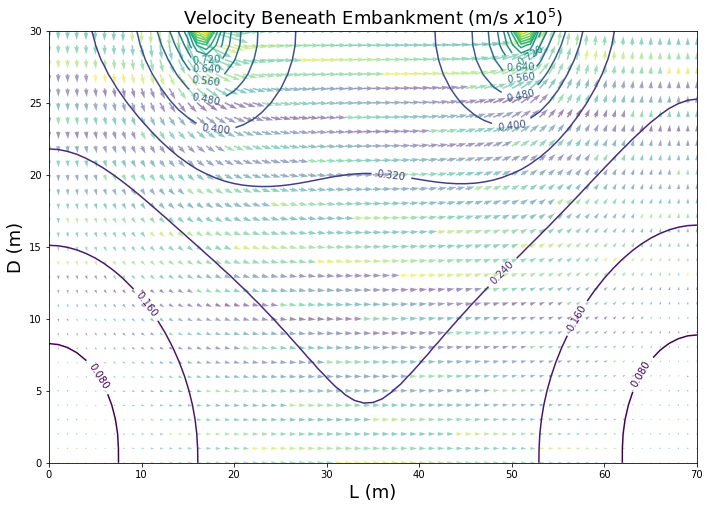

In [6]:
#Plot quiver and velocity contour
plt.axes([1.5, 1.5, 1.5, 1.5])
plt.quiver(velU, velV, R, alpha=0.5, linewidth=2)
cs = plt.contour(VELOCITYMATRIX*(10**5),20)
plt.clabel(cs, inline = True)
plt.xlabel('L (m)',fontsize=18)
plt.title('Velocity Beneath Embankment (m/s $x 10^5$)',fontsize=18)
plt.ylabel('D (m)',fontsize=18)
plt.show()

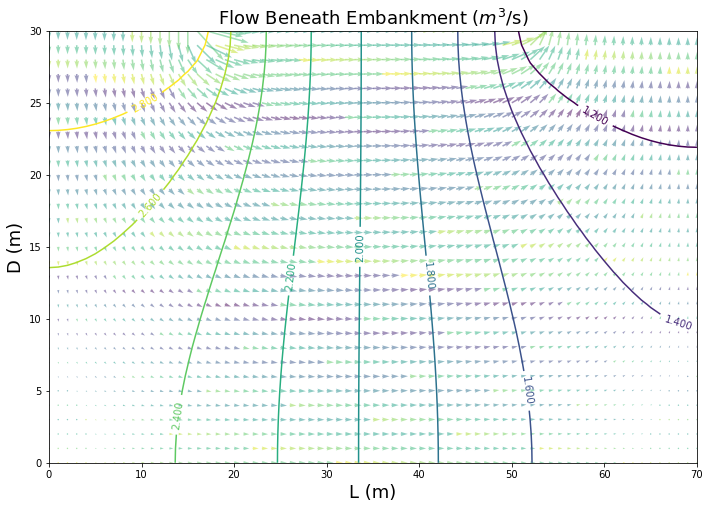

In [7]:
#Plot quiver and velocity contour
plt.axes([1.5, 1.5, 1.5, 1.5])
plt.quiver(velU, velV, R, alpha=0.5, linewidth=2)
cs = plt.contour(FLOW,10)
plt.clabel(cs, inline = True)
plt.xlabel('L (m)',fontsize=18)
plt.title('Flow Beneath Embankment ($m^3$/s)',fontsize=18)
plt.ylabel('D (m)',fontsize=18)
plt.show()